<a href="https://colab.research.google.com/github/moinist/AIB_18_Sprint1_Project/blob/main/Section1_Project_Final_%EA%B9%80%ED%98%B8%EC%9D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## S1 Project / AI_18_김호인

---

# **다음 분기에 어떤 게임을 설계해야 할까요?**
\
## 💡 핵심 내용

  - 지역에 따라서 선호하는 게임 장르 차이
- 지역 구분 기준
- 지역별로 선호하는 게임의 장르 파악
- 지역별로 선호하는 게임의 장르 구분 근거
  - 연도별 게임의 트렌드
- 트렌드 파악 기준
- 연도별로 트렌드 존부
- 트렌드 존부 판단 기준
  - 인기가 많은 게임에 대한 분석 및 시각화 프로세스
- 인기가 많다는 것의 정의 기준
- 해당 게임이 인기가 많다고 판단한 기준
- 시각화를 통해 무엇을 나타내고자 하는지
- 해당 분석을 통해 도출할 수 있는 인사이트
  - 다음 분기에 어떤 게임을 설계해야 하는지에 대한 결론

\



# **Part 1. Gathering Data**



In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'
original_df = pd.read_csv(file)

# **Part 2. Data Preprocessing**

<h3><b> 2-1) EDA </b></h3>

EDA는 탐색적 데이터 분석의 약자로 통계치와 시각화를 통해 데이터를 먼저 이해하는 과정을 일컫는 개념입니다.

여기에서는 Pandas의 메소드들을 활용하여 간단한 탐색을 해보도록 하겠습니다.

In [61]:
# 데이터셋의 개형 파악
original_df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


> **🔎 해설**  

확인 결과, 총 10개의 Feature가 존재함을 파악할 수 있습니다.\
이 중 Unnamed: 0 Column의 경우에는 무의미한 것으로 보이므로 해당 컬럼을 제거하겠습니다.

나머지 9개의 Feature는 다음과 같은 내용을 보여줍니다.

- Name : 게임의 이름입니다.
- Platform : 게임이 지원되는 플랫폼의 이름입니다.
- Year : 게임이 출시된 연도입니다.
- Genre : 게임의 장르입니다.
- Publisher : 게임을 배급한 회사입니다.
- NA_Sales : 북미지역에서의 출고량입니다.
- EU_Sales : 유럽지역에서의 출고량입니다.
- JP_Sales : 일본지역에서의 출고량입니다.
- Other_Sales : 기타지역에서의 출고량입니다.

In [62]:
# Unnamed: 0 Column 제거
original_df.drop(columns=['Unnamed: 0'], inplace=True)
original_df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [63]:
# 데이터셋의 info 확인
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


> **🔎 해설** 

  - **결측치**
- 데이터 셋의 전반적인 정보를 살펴본 결과, Year, Genre, Publisher Column에 결측치가 있음을 확인
- 결측치 수 자체가 적고, Year 결측치는 섣불리 다른 숫자로 대체하기 위한 적절한 방안이 없어서 제거
- Genre는 분류하기 어려운 기타 게임 장르를 Miscellaneous로 처리하는 관행을 따라 결측치를 Misc로 대체
- Publisher는 기존 데이터셋 내의 Unknown이라는 처리방식을 따라 결측치 대체
  - **데이터타입**
- Year Column은 원칙적으로 int형 데이터인데 float 타입으로 처리되고 있음을 확인
- NA_Sales,	EU_Sales,	JP_Sales,	Other_Sales Column은 Numerical 데이터인데 데이터타입이 object임을 확인

In [64]:
# 데이터셋 내 중복치 확인
original_df.loc[original_df.duplicated(subset = ['Name', 'Platform', 'Year', 'Genre', 'Publisher'], keep=False)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
7346,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,2.11,0.23,0,0.22
8055,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0
8717,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0,0.01,0,0
9184,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0


In [65]:
# 데이터셋 내 이름이 중복되는 샘플1
original_df.query('Name == "Need for Speed: Most Wanted"')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1318,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.8,0.01,0.15
1511,Need for Speed: Most Wanted,PS3,2012.0,Racing,Electronic Arts,0.71,1.51,0.06,0.61
2673,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,20K,0.23,0,0.05
4672,Need for Speed: Most Wanted,GBA,2005.0,Racing,Electronic Arts,0.19,0.07,0,0
11042,Need for Speed: Most Wanted,PSV,2012.0,Racing,Electronic Arts,0.38,0.52,0.01,0.25
11335,Need for Speed: Most Wanted,PS2,2005.0,Racing,Electronic Arts,2.03,1.79,0.08,0.47
12177,Need for Speed: Most Wanted,DS,2005.0,Racing,Electronic Arts,0.24,0.01,0,0.02
12529,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1,0.17,0.02,0.1
13617,Need for Speed: Most Wanted,WiiU,2013.0,Racing,Electronic Arts,0.14,0.12,0,0.02
13808,Need for Speed: Most Wanted,PC,2012.0,Racing,Electronic Arts,0,0.06,0,0.02


In [66]:
# 데이터셋 내 이름이 중복되는 샘플2
original_df.query('Name == "Rock Band"')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
4181,Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0,0.2
10776,Rock Band,PS3,NaN,Misc,Electronic Arts,0.99,0.41,0,0.22
12858,Rock Band,PS2,NaN,Misc,Electronic Arts,0.71,0.06,0,0.35


> **🔎 해설** 

  - 중복치
- Name, Platform, Year, Genre, Publisher까지 모두 같은 경우에 중복치로 판단
- 해당 Feature들이 모여서 해당 행의 식별 키인 Primary key로 역할
- 데이터셋 내에 Name이 중복되는 데이터들이 있는데, 게임의 경우에는 플랫폼 마다 혹은 다른 배급사가 다른 년도에 별도로 출시되는 경우들이 있기 때문에 제거해야 하는 데이터는 아니라고 판단

\

<h3><b> 2-2) Data Wrangling </b></h3>

EDA를 통해 품질적 문제를 파악했고, 구조적 문제는 없음을 확인했습니다. \
품질적 문제에 대해서 보다 자세한 탐색 및 정제 과정을 거치도록 하겠습니다.

In [67]:
# 원본 데이터프레임 유지를 위한 Copy 시행
df = original_df.copy()

#### **a. `결측치 수정`**

EDA 과정에서 결측치가 있는 것으로 확인한 Column들의 데이터를 구체적으로 살펴보고 알맞게 수정하겠습니다.

In [68]:
# Year 칼럼 결측치 확인
df[df.Year.isnull()].head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
358,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0,0,0
430,Famista 64,N64,NaN,Sports,Namco Bandai Games,0,0,0.17,0.03


In [69]:
# Genre 칼럼 결측치 확인
df[df.Genre.isnull()].head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
50,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
408,NBA Ballers,XB,2004.0,NaN,Midway Games,0.37,0.11,0,0.02
1328,NFL Street,XB,2004.0,NaN,Electronic Arts,0.49,0.15,0,0.02
1582,SingStar Singalong With Disney,PS2,2008.0,NaN,Sony Computer Entertainment,0,0.04,0,0.57
1971,Pokemon X/Pokemon Y,3DS,2013.0,NaN,Nintendo,5170K,4.05,4.34,0.79


In [70]:
# Publisher 칼럼 결측치 확인
df[df.Publisher.isnull()].head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
272,UK Truck Simulator,PC,2010.0,Simulation,NaN,0,0.03,0,0
1313,All Grown Up!: Game Boy Advance Video Volume 1,GBA,2004.0,Misc,NaN,0.17,0.06,0,0
1560,Teenage Mutant Ninja Turtles: Game Boy Advance...,GBA,2004.0,Misc,NaN,0.12,0.04,0,0
1789,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.16,0.06,0,0
1879,Monster Hunter Frontier Online,PS3,NaN,Role-Playing,NaN,0,0,0.05,0


In [71]:
# Year Column 결측치 제거
df= df.dropna(subset = ['Year'])
df.Year = df.Year.astype(int)

/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [72]:
# 나머지 결측치 수정
df.Genre.fillna('Misc', inplace=True)
df.Publisher.fillna('Unknown', inplace=True)

/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


#### **b. `중복치 제거`**

EDA 과정에서 확인한 중복치들을 제거하겠습니다.

In [73]:
df = df.drop_duplicates(subset = ['Name', 'Platform', 'Year', 'Genre', 'Publisher'])
df.shape

(16326, 9)

#### **c. `부정확한 데이터 수정`**

Year Column과 수치형이어야 함에도 불구하고, Object 데이터타입으로 되어있는 Column들을 살펴보고 문자열들을 제거한 후에 데이터타입을 수정했습니다.

In [74]:
# Year Column의 부정확한 데이터 확인
error_2000 = df.query('(Year >= 0 & Year < 10)')
error_2000.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
74,Age of Empires III: Complete Collection,PC,9,Strategy,Microsoft Game Studios,0.01,0.12,0,0.03
768,NASCAR Thunder 2004,PS2,3,Racing,Electronic Arts,0.53,0.41,0,0.14
1015,Wolfenstein,PC,9,Shooter,Activision,0.01,0.03,0,0.01
1220,Ratchet & Clank: Going Commando,PS2,3,Platform,Sony Computer Entertainment,1.44,0.83,0.26,0.25
1364,LEGO Star Wars II: The Original Trilogy,PS2,6,Action,LucasArts,1.85,0.64,0.01,0.19


In [75]:
error_2010 = df.query('Year >= 10 & Year < 23')
error_2010.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
213,NASCAR Unleashed,PS3,11,Racing,Activision,0.09,0,0,0.01
304,Kung Fu Panda: Showdown of Legendary Legends,PS3,15,Action,Little Orbit,0,0.02,0,0
3020,Toaru Kagaku no Chou Denjihou,PSP,11,Adventure,Kadokawa Shoten,0,0,0.06,0
3044,Kamen Rider Battle: Ganbaride,DS,10,Strategy,Namco Bandai Games,0,0,0.14,0
4010,Uncharted 4: A Thief's End,PS4,16,Shooter,Sony Computer Entertainment,1.3M,2.07,0.18,0.65


In [76]:
error_20c = df.query('Year >= 23 & Year < 1980')
error_20c.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
81,Treasures of the Deep,PS,97,Action,Namco Bandai Games,0.1,0.07,0,0.01
906,Mini-Yonku Shining Scorpion: Let's & Go!!,SNES,96,Racing,ASCII Entertainment,0,0,0.9,0
2429,Casper,PS,96,Adventure,Interplay,0.46,0.31,0,0.05
3492,Glover,N64,98,Platform,Hasbro Interactive,0.72,0.17,0,0.01
4365,Adventure Island,NES,86,Platform,Hudson Soft,0,0,1.05,0


In [77]:
# Year Column의 부정확한 데이터 수정
error_2000.Year = error_2000.Year.astype(str)
error_2010.Year = error_2010.Year.astype(str)
error_20c.Year = error_20c.Year.astype(str)

error_2000.Year[error_2000.Year.str.contains('([0-9])')] = '200' + error_2000.Year[error_2000.Year.str.contains('([0-9])')].astype(str)
error_2010.Year[error_2010.Year.str.contains('([0-9])')] = '20' + error_2010.Year[error_2010.Year.str.contains('([0-9])')].astype(str)
error_20c.Year[error_20c.Year.str.contains('([0-9])')] = '19' + error_20c.Year[error_20c.Year.str.contains('([0-9])')].astype(str)

df.loc[error_2000.index] = error_2000
df.loc[error_2010.index] = error_2010
df.loc[error_20c.index] = error_20c
df.Year.unique()

/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-77-888960313193>:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  error_2000.Year[error_2000.Year.str.contains('([0-9])')] = '200' + error_2000.Year[error_2000.Year.str.contains('([0-9])')].astype(str)
/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
<ipython-input-77-888960

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
       '2009', '1997', 1995, 1993, 2012, 1987, 1982, '2011', 1994, 1990,
       '2015', 1992, 1991, 1983, 1988, 1981, '2003', 1989, '1996', '2006',
       '2008', 1986, '2001', '2005', '2004', '2010', '1998', '2007',
       '2016', '1986', '2014', '1995', 2017, 1980, 2020, '2002', '2013',
       '2000', '2012', '1994'], dtype=object)

> **🔎 해설** 

  - Year Column
- 해당 Column 부정확한 데이터들은 명확한 작성의도가 보이기 때문에 수정하여 사용
- 부정확한 년도 데이터들을 한자리수, 10 이상 23 이하의 두자리수, 90 이상 1980 미만의 수로 나누어 처리
- 처리한 데이터 중 일부를 실제 게임 출시년도와 비교해보았을 때 일치

In [78]:
# 북미 출고량 부정확한 데이터 확인
df[df.NA_Sales.str.contains('([a-zA-Z])')]

<ipython-input-78-c3161d085223>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df[df.NA_Sales.str.contains('([a-zA-Z])')]


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001,Racing,Empire Interactive,480K,0.33M,0K,0.06
45,Resident Evil: Revelations 2,PS3,2015,Action,Capcom,60K,0.08,0.16,0.03
145,TOCA Race Driver 3,PC,2006,Racing,Codemasters,0K,0.02,0,0
447,Medal of Honor: Warfighter,X360,2012,Action,Electronic Arts,0.58M,0.47,0.01,0.1
458,F1 2010,PS3,2010,Racing,Codemasters,0.25M,0.76,0.08,0.27
...,...,...,...,...,...,...,...,...,...
16330,Midway Arcade Treasures,PS2,2003,Misc,Midway Games,720K,0.56,0,0.19
16408,NASCAR 06: Total Team Control,PS2,2005,Racing,Electronic Arts,0.53M,0.02,0,0.09
16482,Super Robot Taisen F Kanketsuhen,SAT,1998,Strategy,Banpresto,0M,0,0.55,0
16492,Mortal Kombat,PSV,2012,Fighting,Warner Bros. Interactive Entertainment,470K,0.18,0,0.12


In [79]:
# 유럽 출고량 부정확한 데이터 확인
df[df.EU_Sales.str.contains('([a-zA-Z])')]

<ipython-input-79-32cf6aab6def>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df[df.EU_Sales.str.contains('([a-zA-Z])')]


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001,Racing,Empire Interactive,480K,0.33M,0K,0.06
36,Advance Wars: Dual Strike,DS,2005,Strategy,Nintendo,0.3,0.03M,0.04,0.03
128,Rozen Maiden: Gebetgarten,PS2,2007,Fighting,Taito,0,0K,0.01,0
138,Warriors Orochi 3,PS4,2014,Action,Tecmo Koei,0.04,50K,0.04,0.02
176,Max Payne,GBA,2003,Shooter,Take-Two Interactive,0.02,0.01M,0,0
...,...,...,...,...,...,...,...,...,...
16347,Aladdin Magic Racer,Wii,2011,Racing,Big Ben Interactive,0.01,0M,0,0
16374,Kill.Switch,XB,2003,Shooter,Namco Bandai Games,0.18,50K,0,0.01
16384,Tomb Raider: Underworld,PS2,2009,Action,Eidos Interactive,0.09,0.04M,0,0.05
16525,Planet Monsters,GBA,2001,Action,Titus,0.01,0K,0,0


In [80]:
# 일본 출고량 부정확한 데이터 확인
df[df.JP_Sales.str.contains('([a-zA-Z])')]

<ipython-input-80-f08c6e8618cf>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df[df.JP_Sales.str.contains('([a-zA-Z])')]


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001,Racing,Empire Interactive,480K,0.33M,0K,0.06
89,Bugs Bunny: Lost in Time,PS,1999,Platform,Infogrames,0.22,0.15,0K,0.03
90,Tom Clancy's Ghost Recon: Predator,PSP,2010,Shooter,Ubisoft,0.07,0.02,0K,0.02
493,Rise of Nightmares,X360,2011,Action,Sega,0.28,0.13,0.01M,0.04
584,Imagine: Figure Skater (US sales),DS,2007,Sports,Ubisoft,0.46,0.01,0M,0
...,...,...,...,...,...,...,...,...,...
16315,MX World Tour Featuring Jamie Little,PS2,2005,Racing,Play It,0.08,0.07,0K,0.02
16321,Tomb Raider: The Prophecy,GBA,2002,Action,Ubisoft,0.1,0.04,0K,0
16476,NBA Ballers: Chosen One,PS3,2008,Sports,Midway Games,0.12,0,0K,0.01
16499,Shin Chan: Las Nuevas Aventuras Para Wii!,Wii,2006,Action,505 Games,0,0,0.07M,0


In [81]:
# 기타지역 출고량 부정확한 데이터 확인
df[df.Other_Sales.str.contains('([a-zA-Z])')]

<ipython-input-81-6031143dfb92>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df[df.Other_Sales.str.contains('([a-zA-Z])')]


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
64,SD Gundam Force,GBA,2004,Shooter,Namco Bandai Games,0.01,0,0,0M
73,Teenage Mutant Ninja Turtles,XB,2003,Action,Konami Digital Entertainment,0.22,0.06,0,0.01M
209,Harry Potter and the Sorcerer's Stone,XB,2003,Action,Electronic Arts,0.05,0.02,0,0M
220,Dragon Quest IV: Michibikareshi Monotachi,PS,2001,Role-Playing,Enix Corporation,0,0,1.2,0.01M
243,Seaman 2: Peking Genjin Ikusei Kit,PS2,2007,Simulation,Sega,0,0,0.06,0M
...,...,...,...,...,...,...,...,...,...
16141,World Championship Poker: Featuring Howard Led...,PS2,2006,Misc,Oxygen Interactive,0.82,0.64,0,0.22M
16143,DJ Hero,Wii,2009,Misc,Activision,0.47,0.23,0K,70K
16388,Project Setsuna,PSV,2016,Role-Playing,Square Enix,0,0,0.05,0K
16412,Yu-Gi-Oh! Ultimate Masters: World Championship...,GBA,2006,Misc,Konami Digital Entertainment,0.14,0.05,0.07,0.01M


**🔎 해설**
- 데이터들을 살펴본 결과, 기존 데이터들은 뒤에 M(백만) 단위가 생략되어 있는 데이터임을 유추 가능
- M이 붙어있는 데이터들은 M을 지워주고, K(천)이 붙어있는 데이터들은 K를 지워준 후 '0.001'을 곱해서 사용

In [82]:
# 북미 출고량 부정확한 데이터 교정
df.NA_Sales = df.NA_Sales.str.replace("M", "")
inaccurate = df.NA_Sales[df.NA_Sales.str.contains('([a-zA-Z])')].index
df.NA_Sales = df.NA_Sales.str.replace("K", "")
df.NA_Sales = df.NA_Sales.astype('float')
df.NA_Sales.loc[inaccurate] = df.NA_Sales.loc[inaccurate]*0.001

# 유럽 출고량 부정확한 데이터 교정
df.EU_Sales = df.EU_Sales.str.replace("M", "")
inaccurate = df.EU_Sales[df.EU_Sales.str.contains('([a-zA-Z])')].index
df.EU_Sales = df.EU_Sales.str.replace("K", "")
df.EU_Sales = df.EU_Sales.astype('float')
df.EU_Sales.loc[inaccurate] = df.EU_Sales.loc[inaccurate]*0.001

# 일본 출고량 부정확한 데이터 교정
df.JP_Sales = df.JP_Sales.str.replace("M", "")
inaccurate = df.JP_Sales[df.JP_Sales.str.contains('([a-zA-Z])')].index
df.JP_Sales = df.JP_Sales.str.replace("K", "")
df.JP_Sales = df.JP_Sales.astype('float')
df.JP_Sales.loc[inaccurate] = df.JP_Sales.loc[inaccurate]*0.001

# 기타 지역 부정확한 데이터 교정
df.Other_Sales = df.Other_Sales.str.replace("M", "")
inaccurate = df.Other_Sales[df.Other_Sales.str.contains('([a-zA-Z])')].index
df.Other_Sales = df.Other_Sales.str.replace("K", "")
df.Other_Sales = df.Other_Sales.astype('float')
df.Other_Sales.loc[inaccurate] = df.Other_Sales.loc[inaccurate]*0.001

<ipython-input-82-90a268620541>:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  inaccurate = df.NA_Sales[df.NA_Sales.str.contains('([a-zA-Z])')].index
/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-82-90a268620541>:10: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  inaccurate = df.EU_Sales[df.EU_Sales.str.contains('([a-zA-Z])')].index
<ipython-input-82-90a268620541>:17: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  inaccurate = df.JP_Sales[df.JP_Sales.str.contains('([a-zA-Z])')].index
<ipython-input-82-90a268620541>:24: UserWarning: This pa

In [83]:
# 데이터타입 변환
df = df.astype({'Year': 'int','NA_Sales': 'float64','EU_Sales': 'float64','JP_Sales': 'float64','Other_Sales': 'float64'})

# 데이터 자릿수 맞추기
df = df.round(2)

#### **d. `이상치 제거`**

In [84]:
# 데이터셋의 전체적인 숫자 분포 파악
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16326.000000,16326.000000,16326.000000,16326.000000,16326.000000
mean,2006.406101,0.265431,0.147563,0.078666,0.048328
std,5.828995,0.821613,0.508780,0.311566,0.189891
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


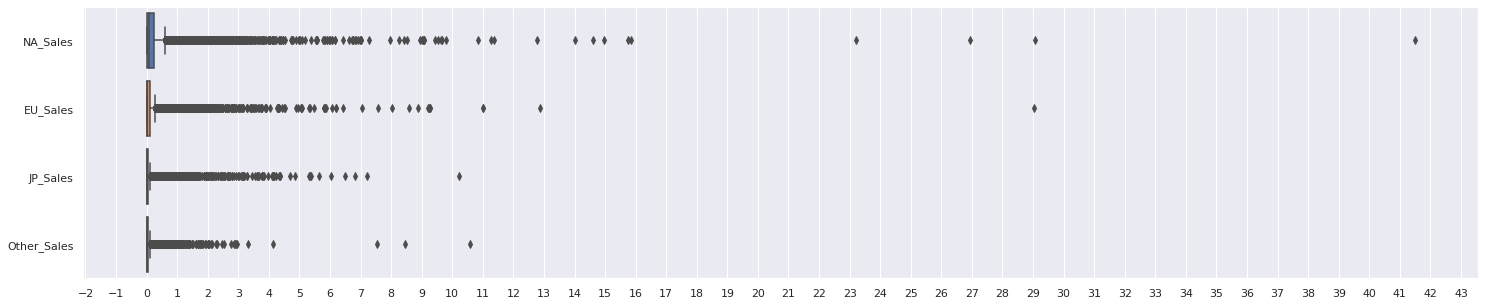

In [85]:
# Box plot을 활용한 이상치 파악
import matplotlib.ticker as ticker

plt.figure(figsize=(25,5))
ax= sns.boxplot(data = df.iloc[:, 5:], orient="h")
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))
plt.show()

In [86]:
# 이상치 의심 데이터 개형 확인
jackpot = df.query('NA_Sales > 5 | EU_Sales > 3 | JP_Sales > 3 | Other_Sales > 1.5')
jackpot.sort_values('NA_Sales', ascending = False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77
10488,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47
1203,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31
...,...,...,...,...,...,...,...,...,...
12966,Yokai Watch 2 Ganso/Honke,3DS,2014,Role-Playing,Nintendo,0.03,0.00,3.18,0.00
8212,Friend Collection,DS,2009,Misc,Nintendo,0.00,0.00,3.67,0.00
15674,Monster Hunter 4,3DS,2013,Role-Playing,Capcom,0.00,0.00,3.44,0.00
11345,Dragon Quest VI: Maboroshi no Daichi,SNES,1995,Role-Playing,Enix Corporation,0.00,0.00,3.19,0.00


**🔎 해설**
- 이상치: 보통 관측된 데이터의 범위에서 많이 벗어난 아주 작은 값이나 큰 값
- 어떤 의사결정을 하는데 필요한 데이터를 분석 혹은 모델링할 경우, 이러한 이상치가 의사결정에 큰 영향을 미칠 수 있기 때문에 데이터 전처리 과정에서의 적절한 이상치 처리는 필수
- Box plot을 통해 파악한 결과, 출고량이 다른 데이터와 비교했을 때 비정상적으로 높은 제품들이 존재하는 것으로 확인되어 세부 검토 진행
- 수염 밖에 위치한 데이터가 매우 많은 관계로 이를 모두 이상치 후보로 놓는 것은 무리가 있다고 판단하여 NA_Sales > 5, EU_Sales > 3, JP_Sales > 3, Other_Sales > 1.5 데이터들을 뽑아서 탐색
- 그 결과, 이상치로 의심되었던 119건의 제품들은 모두 세계적인 베스트셀러 게임
- 해당 데이터들을 제외하고 게임 시장의 규모를 분석하는 것이 무의미하다고 판단하여 보존 결정

<h3><b> 2-3) Feature Engineering </b></h3>

기존 feature들을 재조합하여 새로운 feature를 만드는 과정을 Feature Engineering이라고 합니다.

In [87]:
df['Total_Sales'] = df.NA_Sales + df.EU_Sales + df.JP_Sales + df.Other_Sales
df = df.query('Year < 2017')
df.insert(4, 'Elapsed', 2017 - df.Year)
df['Average_Sales'] = (df.Total_Sales / df.Elapsed).round(4)
df.head()

<ipython-input-87-827ddeb0c742>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Average_Sales'] = (df.Total_Sales / df.Elapsed).round(4)


,Name,Platform,Year,Genre,Elapsed,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Average_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,9,Destineer,0.04,0.00,0.00,0.00,0.04,0.0044
1,The Munchables,Wii,2009,Action,8,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,0.0225
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,7,Alchemist,0.00,0.00,0.02,0.00,0.02,0.0029
3,Deal or No Deal: Special Edition,DS,2010,Misc,7,Zoo Games,0.04,0.00,0.00,0.00,0.04,0.0057
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,7,D3Publisher,0.12,0.09,0.00,0.04,0.25,0.0357


**🔎 해설**
- 다음 해인 2017년을 기준으로 하여 출시 이후 경과기간을 나타내는 Elapsed Feature 생성
- 지역별 Sales를 합한 Total_Sales Feature 생성
- 연간 평균 출고량을 계산한 Average_Sales Feature 생성

In [88]:
# 전처리가 완료된 데이터셋
df

,Name,Platform,Year,Genre,Elapsed,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Average_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,9,Destineer,0.04,0.00,0.00,0.00,0.04,0.0044
1,The Munchables,Wii,2009,Action,8,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,0.0225
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,7,Alchemist,0.00,0.00,0.02,0.00,0.02,0.0029
3,Deal or No Deal: Special Edition,DS,2010,Misc,7,Zoo Games,0.04,0.00,0.00,0.00,0.04,0.0057
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,7,D3Publisher,0.12,0.09,0.00,0.04,0.25,0.0357
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,11,Vivendi Games,0.15,0.04,0.00,0.01,0.20,0.0182
16594,Rainbow Islands: Revolution,PSP,2005,Action,12,Rising Star Games,0.01,0.00,0.00,0.00,0.01,0.0008
16595,NBA 2K16,PS3,2015,Sports,2,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79,0.3950
16596,Toukiden: The Age of Demons,PSV,2013,Action,4,Tecmo Koei,0.05,0.05,0.25,0.03,0.38,0.0950


<h3><b> 2-4) 통계값 및 시각화 활용 </b></h3>

#### **a. `지역에 따라서 선호하는 게임 장르가 다를까요?`**
 - 지역은 어떻게 구분했는지 설명하겠습니다.
 - 지역별로 선호하는 게임의 장르를 파악해보겠습니다.
 - 지역별로 선호하는 게임의 장르가 왜 같다고/다르다고 생각했는지를 설명하겠습니다.

In [89]:
# 지역별 출고량
print("Total_NA_Sales: ", df.NA_Sales.sum().round(2))
print("Total_EU_Sales: ", df.EU_Sales.sum().round(2))
print("Total_JP_Sales: ", df.JP_Sales.sum().round(2))
print("Total_Other_Sales: ", df.Other_Sales.sum().round(2))

Total_NA_Sales:  4333.16
Total_EU_Sales:  2409.11
Total_JP_Sales:  1284.25
Total_Other_Sales:  788.99


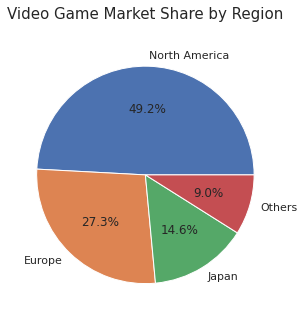

In [90]:
# 시각화
Region = ['North America', 'Europe', 'Japan', 'Others']
Sales = [df.NA_Sales.sum(), df.EU_Sales.sum(), df.JP_Sales.sum(), df.Other_Sales.sum()]

plt.figure(figsize = (10, 5))
plt.pie(Sales, labels = Region, autopct = '%.1f%%')
plt.title('Video Game Market Share by Region',pad=20, fontdict={'fontsize':15})
plt.show()

In [91]:
# 장르별 시장 규모
df_genre = df.groupby('Genre')['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales',	'Total_Sales'].sum()
df_genre['NA_Ratio'] = df_genre.NA_Sales/df_genre.Total_Sales*100
df_genre['EU_Ratio'] = df_genre.EU_Sales/df_genre.Total_Sales*100
df_genre['JP_Ratio'] = df_genre.JP_Sales/df_genre.Total_Sales*100
df_genre['Other_Ratio'] = df_genre.Other_Sales/df_genre.Total_Sales*100
df_genre.sort_values('Total_Sales', ascending = False)

<ipython-input-91-91d675391882>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_genre = df.groupby('Genre')['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales',	'Total_Sales'].sum()


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,NA_Ratio,EU_Ratio,JP_Ratio,Other_Ratio
Genre,,,,,,,,,
Action,858.78,513.64,156.60,183.99,1713.01,50.132807,29.984647,9.141803,10.740743
Sports,667.26,370.96,134.76,132.35,1305.33,51.118108,28.418867,10.323826,10.139199
Shooter,574.48,310.23,38.18,101.86,1024.75,56.060503,30.273725,3.725787,9.939985
Role-Playing,318.76,183.10,342.89,56.73,901.48,35.359631,20.311044,38.036340,6.292985
Misc,420.90,223.32,117.06,78.28,839.56,50.133403,26.599647,13.943018,9.323932
Platform,445.38,200.65,130.53,51.45,828.01,53.789205,24.232799,15.764302,6.213693
Racing,354.70,235.03,56.32,76.51,722.56,49.089349,32.527403,7.794508,10.588740
Fighting,220.35,99.90,87.14,36.15,443.54,49.679848,22.523335,19.646481,8.150336
Simulation,181.16,113.17,63.54,31.30,389.17,46.550351,29.079837,16.327055,8.042758


In [92]:
# 게임 장르별 지역 출고량 비율
genre_region = pd.DataFrame({'NA':[]})
genre_region['NA'] = df_genre.NA_Sales/df.NA_Sales.sum()*100
genre_region['EU'] = df_genre.EU_Sales/df.EU_Sales.sum()*100
genre_region['JP'] = df_genre.JP_Sales/df.JP_Sales.sum()*100
genre_region['Others'] = df_genre.Other_Sales/df.Other_Sales.sum()*100

In [93]:
# 지역별 선호 게임 장르 비교
genre_region_rank = pd.DataFrame({'NA_rank':[]})
genre_region_rank['NA_rank'] = genre_region.sort_values('NA',ascending = False).index
genre_region_rank['NA_share(%)'] = genre_region.sort_values('NA',ascending = False).reset_index()['NA'].round(2)
genre_region_rank['EU_rank'] = genre_region.sort_values('EU',ascending = False).index
genre_region_rank['EU_share(%)'] = genre_region.sort_values('EU',ascending = False).reset_index()['EU'].round(2)
genre_region_rank['JP_rank'] = genre_region.sort_values('JP',ascending = False).index
genre_region_rank['JP_share(%)'] = genre_region.sort_values('JP',ascending = False).reset_index()['JP'].round(2)
genre_region_rank['Other_rank'] = genre_region.sort_values('Others',ascending = False).index
genre_region_rank['Other_share(%)'] = genre_region.sort_values('Others',ascending = False).reset_index()['Others'].round(2)
genre_region_rank.index = genre_region_rank.index + 1
genre_region_rank

,NA_rank,NA_share(%),EU_rank,EU_share(%),JP_rank,JP_share(%),Other_rank,Other_share(%)
1,Action,19.82,Action,21.32,Role-Playing,26.70,Action,23.32
2,Sports,15.40,Sports,15.40,Action,12.19,Sports,16.77
3,Shooter,13.26,Shooter,12.88,Sports,10.49,Shooter,12.91
4,Platform,10.28,Racing,9.76,Platform,10.16,Misc,9.92
5,Misc,9.71,Misc,9.27,Misc,9.12,Racing,9.70
6,Racing,8.19,Platform,8.33,Fighting,6.79,Role-Playing,7.19
7,Role-Playing,7.36,Role-Playing,7.60,Simulation,4.95,Platform,6.52
8,Fighting,5.09,Simulation,4.70,Racing,4.39,Fighting,4.58
9,Simulation,4.18,Fighting,4.15,Puzzle,4.38,Simulation,3.97
10,Puzzle,2.81,Adventure,2.64,Adventure,4.04,Adventure,2.12


**🔎 해설**
- 지역은 주어진 데이터의 기준에 근거하여 북미, 유럽, 일본, 기타 지역으로 구분
- 북미, 유럽, 기타 지역 출고량은 1위 액션 2위 스포츠 3위 슈팅 게임으로 동일
- 일본 지역은 출고량이 1위 롤플레잉 2위 액션 3위 스포츠로 예외적 모습
- 액션과 스포츠 게임은 지역과 관계없이 선호되는 게임 장르
- 일본 시장은 타 지역과 달리 슈팅 게임의 선호도가 극히 낮고 롤플레잉 게임이 이례적으로 높은 선호

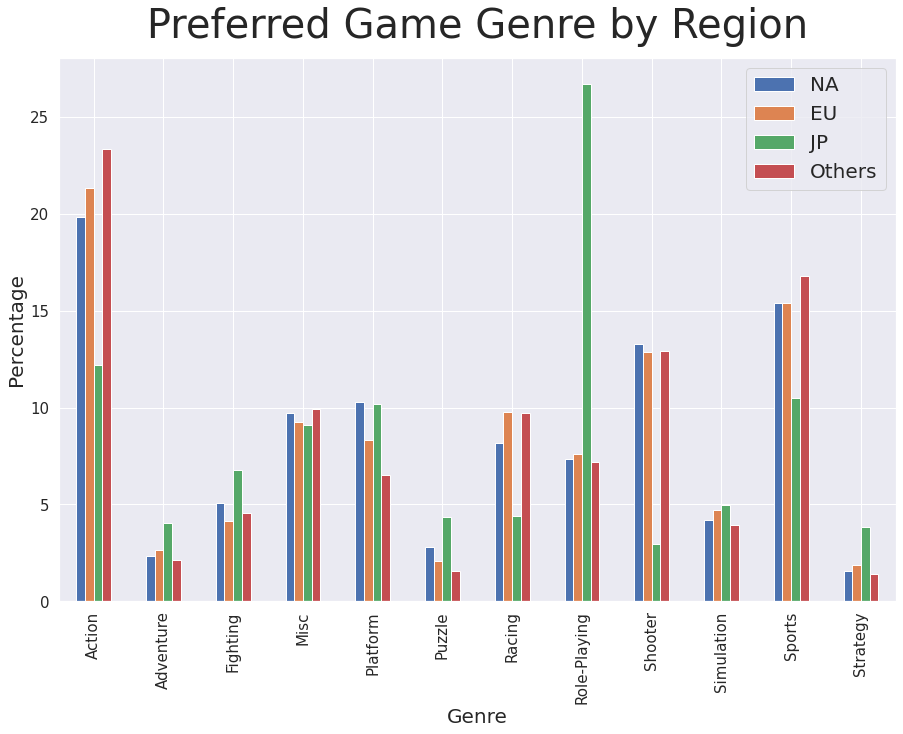

In [94]:
# 시각화
ax = genre_region.plot.bar(figsize=(15,10), fontsize=15)
ax.set_title('Preferred Game Genre by Region',pad=20, fontdict={'fontsize':40})
ax.set_xlabel('Genre',fontdict={'fontsize':20})
ax.set_ylabel('Percentage',fontdict={'fontsize':20})
plt.legend(fontsize=20)
plt.show()

#### **b. `연도별 게임의 트렌드가 있을까요?`**
- 트렌드는 어떤 것을 기준으로 파악했는지
- 연도별로 트렌드가 존재하는지
- 왜 존재한다/존재하지 않는다고 생각했는지

In [95]:
# 연도별 출시되는 게임의 종류 조사
Trend1= df.groupby('Year')['Genre'].value_counts().rename_axis(['Year','Genre']).to_frame('counts').reset_index(level='Genre')
total = df.groupby('Year').count().Name
Trend1['total'] = total
Trend1['Proportion'] = Trend1.counts/Trend1.total
Trend1 = Trend1.reset_index()
Trend1

,Year,Genre,counts,total,Proportion
0,1980,Misc,5,9,0.555556
1,1980,Shooter,2,9,0.222222
2,1980,Action,1,9,0.111111
3,1980,Fighting,1,9,0.111111
4,1981,Action,25,46,0.543478
...,...,...,...,...,...
380,2016,Misc,18,344,0.052326
381,2016,Fighting,14,344,0.040698
382,2016,Platform,10,344,0.029070
383,2016,Strategy,10,344,0.029070


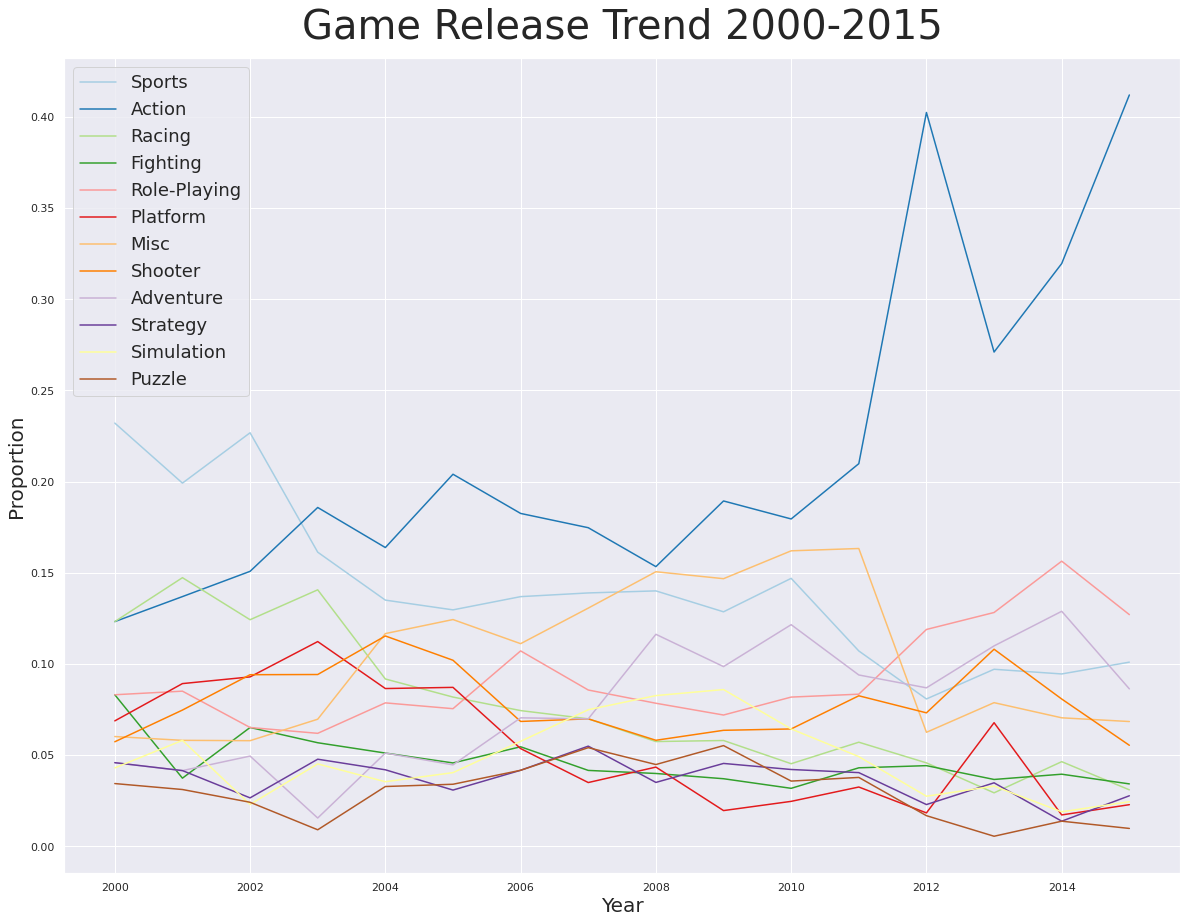

In [96]:
# 시각화
Trend_Lim = Trend1.query('Year < 2000 | Year >2015')
Trend2 = Trend1.drop(Trend_Lim.index).reset_index(drop=True)
plt.figure(figsize=(20,15))
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Proportion', fontsize = 20)
ax = sns.lineplot(data=Trend2, x='Year', y='Proportion', hue='Genre', palette='Paired')
ax.set_title('Game Release Trend 2000-2015',pad=20, fontdict={'fontsize':40})
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.01))
plt.legend(fontsize=18)
plt.show()

**🔎 해설**
- 트렌드는 연도별 출시된 게임의 장르별 비율을 기준으로 파악
- 출고량의 시계열 데이터가 없는 관계로 연도별 출시 편수를 기준으로 채택
- 최근의 자료가 중요하다고 생각하여 2000~2015년 데이터를 기준으로 파악
- 2016년 이후는 데이터 수가 갑자기 현저하게 줄어들어 배제
- 2003년 이후 출시되는 게임 중 가장 많은 비율의 장르는 꾸준하게 액션 게임
- 스포츠 게임 출시 비율이 2002년 이후 전체적으로 하락세
- 레이싱 게임 출시 비율이 2003년 이후 전체적으로 하락세
- 플랫폼 게임 출시 비율이 2003~2009년 하락세
- 롤플레잉 장르 출시 비율이 2009~2014년 성장세
- 어드벤처 장르 출시 비율이 2003~2008년 성장세
- 나머지 장르의 출시 비율은 상대적으로 꾸준한 트렌드

# **Part 3. Data Analysis**

#### **a. `인기가 많은 게임에 대한 분석 및 시각화 프로세스`**
- 인기가 많다는 것을 어떻게 정의했나요?
- 해당 게임이 왜 인기가 많다고 생각했나요?
- 시각화를 통해 무엇을 나타내고자 하는지를 고려했나요?
- 해당 분석을 통해 어떤 인사이트를 도출할 수 있나요?

In [97]:
# 장르별 출시 게임 갯수
Released_Genre = df.Genre.value_counts().reset_index()
Released_Genre = Released_Genre.rename(columns={'index':'Genre', 'Genre':'Released'})
Released_Genre

,Genre,Released
0,Action,3241
1,Sports,2298
2,Misc,1755
3,Role-Playing,1464
4,Shooter,1280
5,Adventure,1270
6,Racing,1220
7,Platform,874
8,Simulation,848
9,Fighting,835


In [98]:
# 게임 시장의 플랫폼 관계없이 콘텐츠 기준으로 분류
df_mod = df.groupby(['Name', 'Year', 'Publisher','Genre'])['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales',	'Total_Sales', 'Average_Sales'].sum().sort_values('Average_Sales', ascending=False)
df_mod = df_mod.reset_index()

<ipython-input-98-3433c5fd55c6>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_mod = df.groupby(['Name', 'Year', 'Publisher','Genre'])['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales',	'Total_Sales', 'Average_Sales'].sum().sort_values('Average_Sales', ascending=False)


In [99]:
# 전체 출고량과 평균 출고량 모두 TOP10
a = df_mod.sort_values('Total_Sales', ascending = False).head(10)
b = df_mod.sort_values('Average_Sales', ascending = False).head(10)
popular = pd.merge(a,b)
popular

,Name,Year,Publisher,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Average_Sales
0,Wii Sports,2006,Nintendo,Sports,41.49,29.02,3.77,8.46,82.74,7.5218
1,Grand Theft Auto V,2013,Take-Two Interactive,Action,16.64,14.58,1.03,5.52,37.77,9.4425


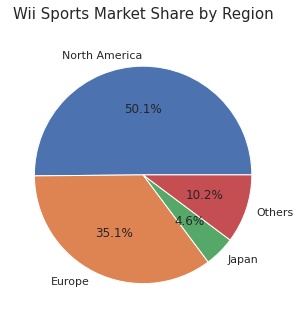

In [100]:
# 시각화
Region = ['North America', 'Europe', 'Japan', 'Others']
Sales = [popular.loc[0].NA_Sales, popular.loc[0].EU_Sales, popular.loc[0].JP_Sales, popular.loc[0].Other_Sales]

plt.figure(figsize = (10, 5))
plt.pie(Sales, labels = Region, autopct = '%.1f%%')
plt.title('Wii Sports Market Share by Region',pad=20, fontdict={'fontsize':15})
plt.show()


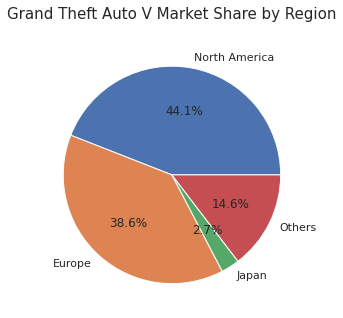

In [101]:
# 시각화
Region = ['North America', 'Europe', 'Japan', 'Others']
Sales = [popular.loc[1].NA_Sales, popular.loc[1].EU_Sales, popular.loc[1].JP_Sales, popular.loc[1].Other_Sales]

plt.figure(figsize = (10, 5))
plt.pie(Sales, labels = Region, autopct = '%.1f%%')
plt.title('Grand Theft Auto V Market Share by Region',pad=20, fontdict={'fontsize':15})
plt.show()

#### **b. `다음 분기에 어떤 게임을 설계해야 하는지에 대한 결론`**


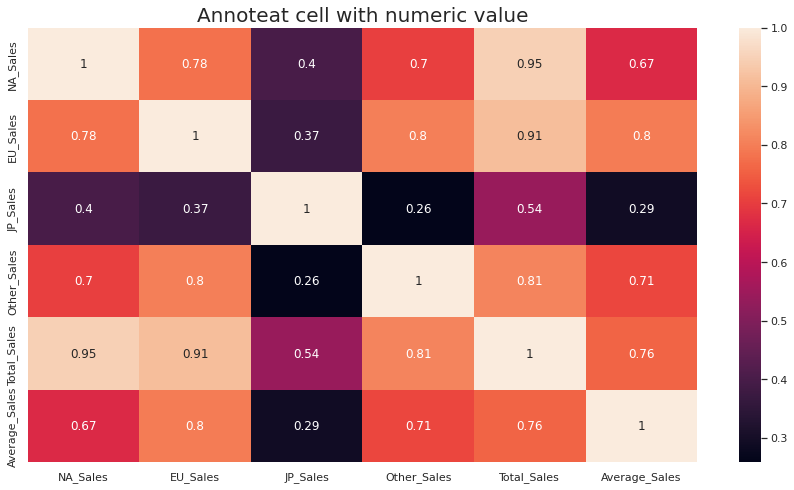

In [102]:
# 어떤 시장을 타겟으로 설계해야 하는가

df_corr = df_mod[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales', 'Average_Sales']].corr()

sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df_corr, annot=True)
plt.title('Annoteat cell with numeric value', fontsize=20)
plt.show()

In [103]:
# 특정 feature만 추출하여 저장
feature = df_mod[['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales',	'Total_Sales', 'Average_Sales']]

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# StandardScaler()를 사용하여 데이터 표준화 
scaler = StandardScaler()
Z = scaler.fit_transform(feature)

# 표준화한 데이터에 대하여 pca 시행 
pca = PCA() 
pca.fit(Z)

B = pca.transform(Z)

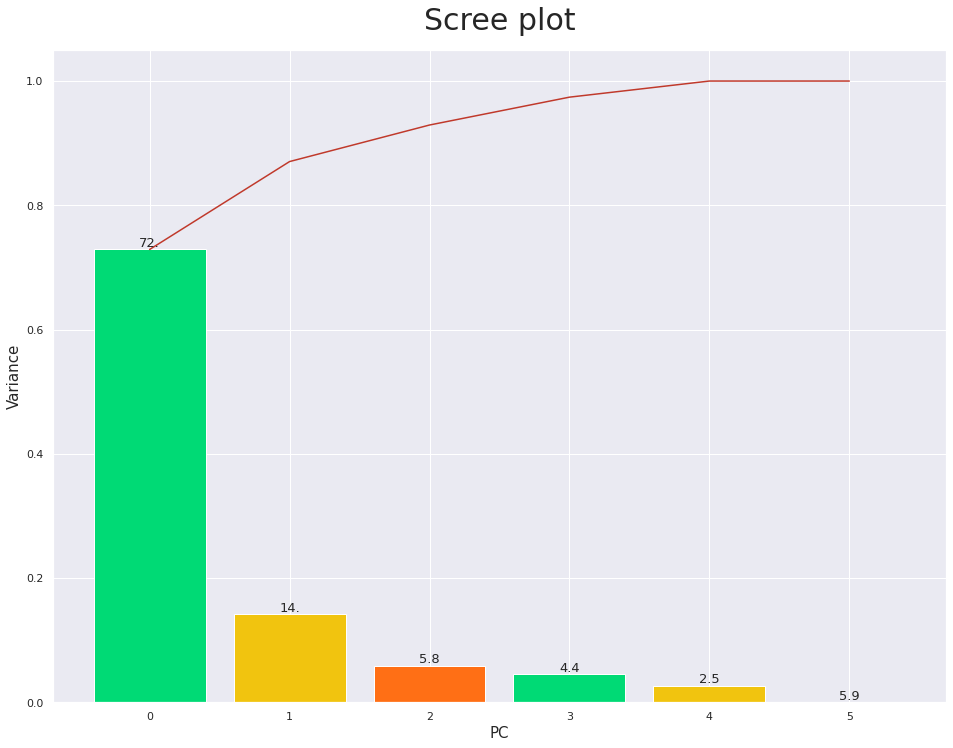

In [105]:
# scree plot으로 나타내는 함수 정의 
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
    plt.figure(figsize=(16,12))
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot 
    
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
     
    ax.set_xlabel("PC", fontsize = 15)
    ax.set_ylabel("Variance", fontsize = 15)
    plt.title('Scree plot', pad=20, fontdict={'fontsize':30})
  
scree_plot(pca)

In [106]:
# 2개로 축소
pca = PCA(2) 
pca.fit(Z)

B = pca.transform(Z)
data_set= pd.DataFrame(B, columns=['pc1','pc2'])
print("\n Projected Data(Z): \n")
data_set


 Projected Data(Z): 



,pc1,pc2
0,36.037490,-11.482610
1,44.196110,-10.576719
2,24.111971,-8.700076
3,78.094809,-6.237192
4,26.905728,-7.663982
...,...,...
12287,-0.701147,-0.135689
12288,-0.700753,-0.108129
12289,-0.700866,-0.108066
12290,-0.703650,-0.133760


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

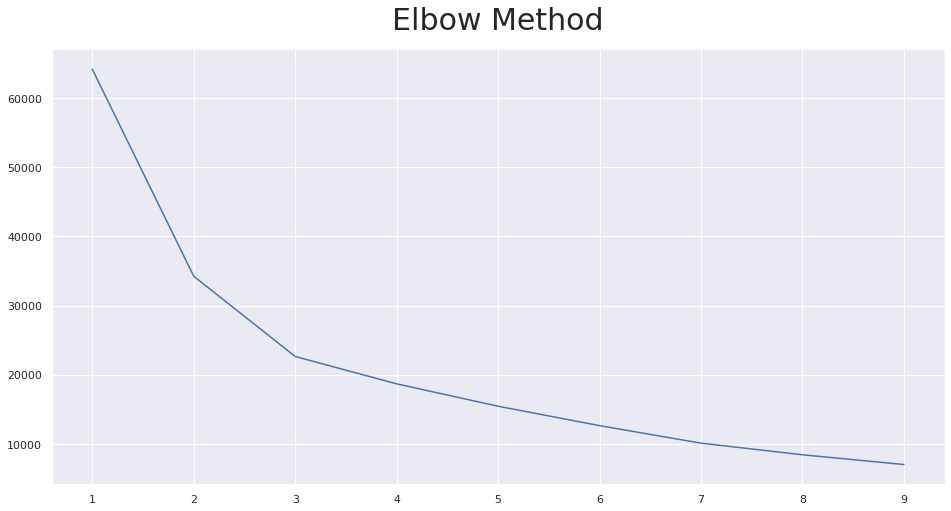

In [107]:
from sklearn.cluster import KMeans

sse = []

for k in range(1,10):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(data_set)
  sse.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(range(1,10), sse)
plt.title('Elbow Method', pad=20, fontdict={'fontsize':30})  
plt.show()

In [108]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_set)
cluster_labels = kmeans.labels_
df_mod = df_mod.assign(cluster = cluster_labels)
df_mod.cluster = df_mod.cluster.astype('object')
cluster_avg = df_mod.groupby(['cluster']).mean()
cluster_avg.round(4)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Average_Sales
cluster,,,,,,,
0,2005.6046,0.1943,0.0923,0.0723,0.0293,0.3882,0.0443
1,2007.8000,10.3595,7.3255,1.9965,2.4955,22.1769,3.5606
2,2006.2700,2.5041,1.5535,0.5546,0.5174,5.1297,0.7279


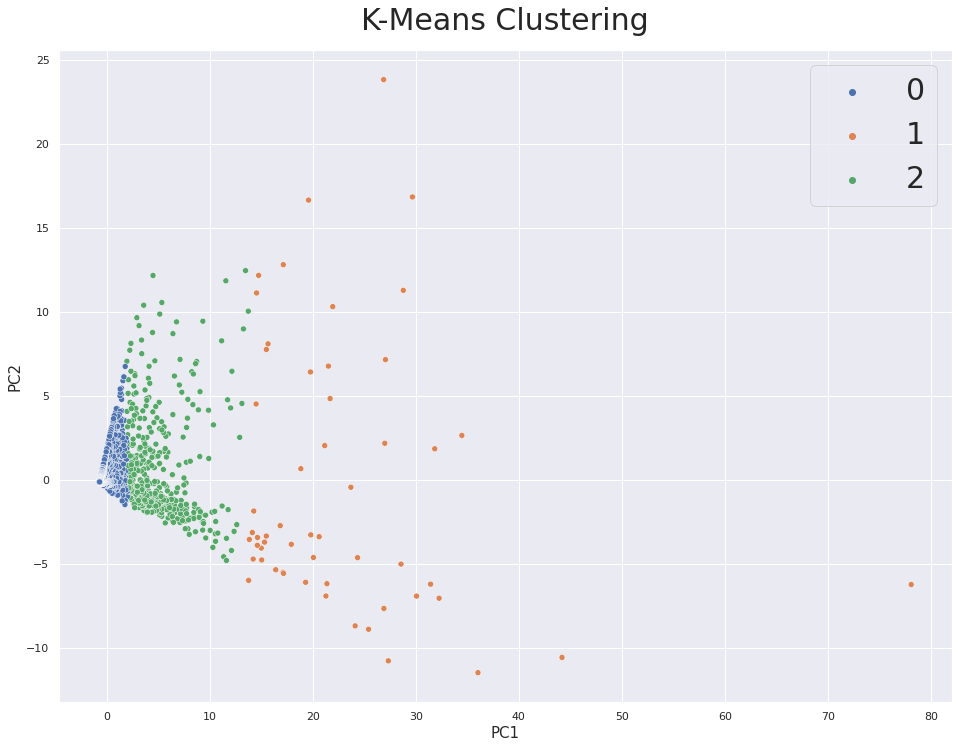

In [109]:
plt.figure(figsize=(16,12))
ax = sns.scatterplot(x = B[:, 0], y = B[:, 1], hue = cluster_labels, palette='deep')
plt.title('K-Means Clustering', pad=20, fontdict={'fontsize':30})
ax.set_xlabel("PC1", fontsize = 15)
ax.set_ylabel("PC2", fontsize = 15) 
plt.legend(fontsize=30)
plt.show()


In [110]:
df_mod.query('cluster == 1').head(10)

,Name,Year,Publisher,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Average_Sales,cluster
0,Call of Duty: Black Ops 3,2015,Activision,Shooter,11.89,9.56,0.43,3.42,25.30,12.6500,1
1,Grand Theft Auto V,2013,Take-Two Interactive,Action,16.64,14.58,1.03,5.52,37.77,9.4425,1
2,FIFA 16,2015,Electronic Arts,Sports,2.98,11.29,0.11,2.05,16.43,8.2150,1
3,Wii Sports,2006,Nintendo,Sports,41.49,29.02,3.77,8.46,82.74,7.5218,1
4,Call of Duty: Advanced Warfare,2014,Activision,Shooter,10.44,8.18,0.34,2.93,21.89,7.2967,1
5,FIFA 17,2016,Electronic Arts,Sports,0.50,5.48,0.07,0.85,6.90,6.9000,1
6,Call of Duty: Ghosts,2013,Activision,Shooter,14.92,9.05,0.48,2.92,27.37,6.8425,1
7,FIFA 15,2014,Electronic Arts,Sports,3.20,12.40,0.13,3.29,19.02,6.3400,1
8,Fallout 4,2015,Bethesda Softworks,Role-Playing,5.42,5.04,0.25,1.57,12.28,6.1400,1
10,Call of Duty: Black Ops II,2012,Activision,Shooter,14.08,11.05,0.72,3.88,29.73,5.9460,1


In [111]:
# 클러스터 1에 해당하는 게임의 장르 가능성 판단
df_mod.query('cluster == 1')['Genre'].value_counts().reset_index()

,index,Genre
0,Shooter,14
1,Sports,10
2,Action,9
3,Role-Playing,6
4,Misc,5
5,Platform,4
6,Racing,3
7,Puzzle,2
8,Fighting,1
9,Simulation,1


In [112]:
# 게임 시장의 플랫폼 관계없이 콘텐츠 기준으로 평균 판매량
df_mod.groupby('Genre').mean().sort_values('Average_Sales', ascending = False).round(4)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Average_Sales
Genre,,,,,,,
Shooter,2004.4972,0.6448,0.3482,0.0429,0.1143,1.1501,0.1979
Action,2006.9503,0.4181,0.2501,0.0762,0.0896,0.8340,0.1294
Sports,2004.1029,0.4548,0.2529,0.0919,0.0902,0.8898,0.1174
Platform,2002.7073,0.7047,0.3175,0.2065,0.0814,1.3101,0.1157
Role-Playing,2006.5777,0.2417,0.1388,0.2600,0.0430,0.6835,0.0929
Racing,2003.6396,0.4233,0.2805,0.0672,0.0913,0.8622,0.0879
Fighting,2003.7712,0.3339,0.1514,0.1320,0.0548,0.6720,0.0746
Misc,2006.8242,0.2913,0.1545,0.0810,0.0542,0.5810,0.0736
Simulation,2006.3647,0.2403,0.1501,0.0843,0.0415,0.5161,0.0570


In [113]:
# 게임시장의 플랫폼 관계없이 콘텐츠 기준으로 전체 판매량
df_mod.groupby('Genre').mean().sort_values('Total_Sales', ascending = False).round(4)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Average_Sales
Genre,,,,,,,
Platform,2002.7073,0.7047,0.3175,0.2065,0.0814,1.3101,0.1157
Shooter,2004.4972,0.6448,0.3482,0.0429,0.1143,1.1501,0.1979
Sports,2004.1029,0.4548,0.2529,0.0919,0.0902,0.8898,0.1174
Racing,2003.6396,0.4233,0.2805,0.0672,0.0913,0.8622,0.0879
Action,2006.9503,0.4181,0.2501,0.0762,0.0896,0.8340,0.1294
Role-Playing,2006.5777,0.2417,0.1388,0.2600,0.0430,0.6835,0.0929
Fighting,2003.7712,0.3339,0.1514,0.1320,0.0548,0.6720,0.0746
Misc,2006.8242,0.2913,0.1545,0.0810,0.0542,0.5810,0.0736
Simulation,2006.3647,0.2403,0.1501,0.0843,0.0415,0.5161,0.0570


In [114]:
shooter = df.query('Genre == "Shooter"')
# 2010년대 이후 한가지 플랫폼으로만 출시한 슈팅 게임
shooter_nd = shooter[~shooter.duplicated(subset = ['Name', 'Year'],keep=False)].query('Year > 2010')
# 2010년대 이후 여러가지 플랫폼으로 출시한 슈팅게임
shooter_d = shooter[shooter.duplicated(subset = ['Name', 'Year'])]
shooter_mod = shooter.groupby(['Name', 'Year'])['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales',	'Total_Sales', 'Average_Sales'].sum().reset_index()
shooter_mod_d = shooter_mod[shooter_mod.Name.isin(shooter_d.Name)].query('Year > 2010')

<ipython-input-114-58b3d873778e>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  shooter_mod = shooter.groupby(['Name', 'Year'])['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales',	'Total_Sales', 'Average_Sales'].sum().reset_index()


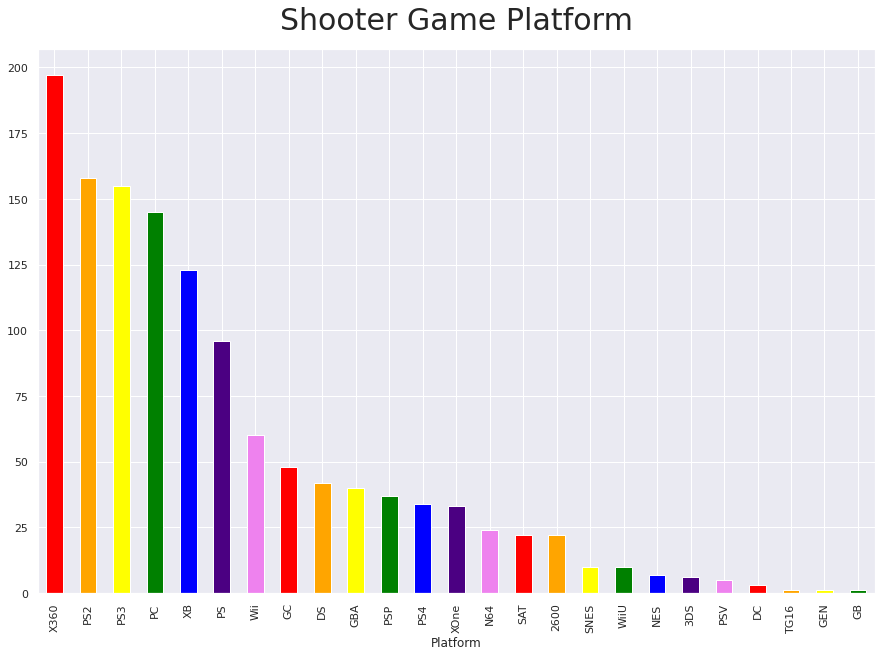

In [115]:
# 슈팅 게임의 플랫폼 현황

shooter_p = shooter.value_counts('Platform')
plt.figure(figsize = (15,10))
plt.title('Shooter Game Platform',pad=20, fontdict={'fontsize':30})
shooter_p.plot(kind='bar', color = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet'])
plt.show()

In [116]:
# 플랫폼별 시장 규모
df_platform = df.groupby('Platform').sum()
df_platform['NA_Ratio'] = df_platform.NA_Sales/df_platform.Total_Sales*100
df_platform['EU_Ratio'] = df_platform.EU_Sales/df_platform.Total_Sales*100
df_platform['JP_Ratio'] = df_platform.JP_Sales/df_platform.Total_Sales*100
df_platform['Other_Ratio'] = df_platform.Other_Sales/df_platform.Total_Sales*100
df_platform.sort_values('Total_Sales', ascending = False).round(4)

,Year,Elapsed,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Average_Sales,NA_Ratio,EU_Ratio,JP_Ratio,Other_Ratio
Platform,,,,,,,,,,,,
PS2,4263750,26409,572.92,332.63,137.54,190.47,1233.56,96.4133,46.4444,26.9650,11.1498,15.4407
X360,2482205,8790,594.33,278.01,12.30,84.67,969.31,155.8203,61.3147,28.6812,1.2689,8.7351
PS3,2620097,8054,388.90,340.46,79.21,140.81,949.38,166.2239,40.9636,35.8613,8.3433,14.8318
Wii,2591562,10368,497.37,264.35,68.28,79.20,909.20,112.0028,54.7041,29.0750,7.5099,8.7110
DS,4281473,18771,388.29,194.07,175.02,60.27,817.65,89.8427,47.4885,23.7351,21.4052,7.3711
PS,2375627,22586,334.71,212.38,139.78,40.69,727.56,38.6495,46.0045,29.1907,19.2122,5.5927
GBA,1624604,11183,184.12,74.59,46.56,7.61,312.88,22.4764,58.8468,23.8398,14.8811,2.4322
PSP,2404440,9909,107.09,67.16,75.89,41.52,291.66,33.1543,36.7174,23.0268,26.0200,14.2358
PS4,675025,670,96.80,123.70,14.27,43.36,278.13,136.0535,34.8039,44.4756,5.1307,15.5898


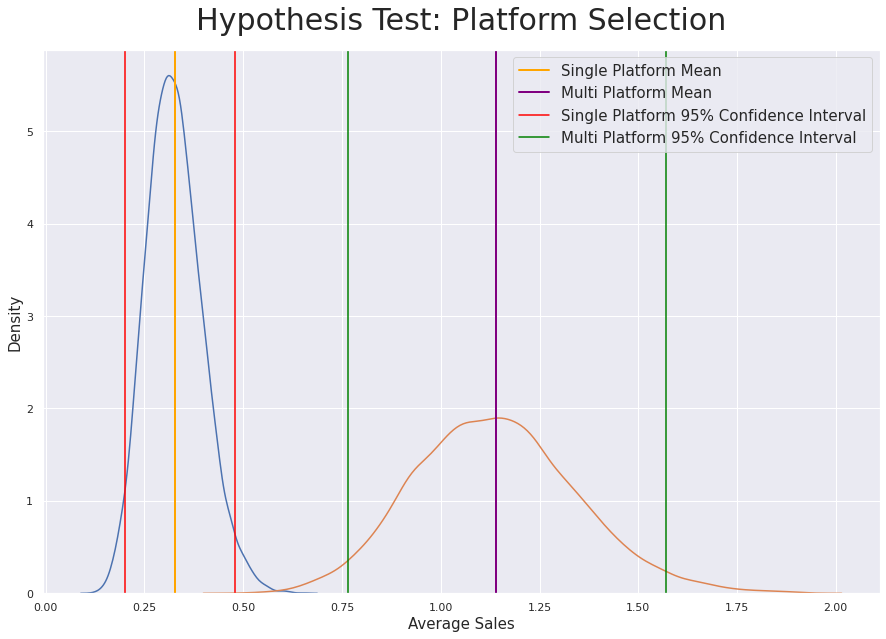

In [117]:
'''
가설 검정

귀무가설: 한가지 플랫폼으로만 출시한 슈팅게임이 여러가지 플랫폼으로 출시한 슈팅게임보다 평균 출고량이 많거나 같다
대립가설: 한가지 플랫폼으로만 출시한 슈팅게임이 여러가지 플랫폼으로 출시한 슈팅게임보다 평균 출고량이 적다
'''

import scipy.stats as st
import statistics

# 부트스트랩: 한가지 플랫폼으로만 출시한 슈팅게임

np.random.seed(42)

sample_nd = []

for _ in range(10000):
  sample = np.random.choice(shooter_nd.Average_Sales, 100, replace=True) # replace 파라미터가 하는 역할이 무엇인지 생각해보세요.
  sample_nd.append(sample.mean())

# 부트스트랩: 여러가지 플랫폼으로 출시한 슈팅게임

np.random.seed(10)

sample_d = []

for _ in range(10000):
  sample = np.random.choice(shooter_mod_d.Average_Sales, 100, replace=True) # replace 파라미터가 하는 역할이 무엇인지 생각해보세요.
  sample_d.append(sample.mean())

# 시각화
plt.figure(figsize=(15,10))
ax_nd = sns.kdeplot(data=sample_nd)
ax_d = sns.kdeplot(data=sample_d)
mean_nd = statistics.mean(sample_nd)
mean_d = statistics.mean(sample_d)
plt.axvline(mean_nd, c='orange', lw=2, label='Single Platform Mean')
plt.axvline(mean_d, c='purple', lw=2, label='Multi Platform Mean')
plt.title('Hypothesis Test: Platform Selection',pad=20, fontdict={'fontsize':30})
lower_nd, upper_nd = np.percentile(sample_nd, 2.5), np.percentile(sample_nd, 97.5) 
plt.axvline(lower_nd, c='red', label='Single Platform 95% Confidence Interval')
plt.axvline(upper_nd, c='red')
lower_d, upper_d = np.percentile(sample_d, 2.5), np.percentile(sample_d, 97.5) 
plt.axvline(lower_d, c='green', label='Multi Platform 95% Confidence Interval')
plt.axvline(upper_d, c='green')
plt.xlabel('Average Sales',fontdict={'fontsize':15})
plt.ylabel('Density',fontdict={'fontsize':15})
plt.legend(fontsize=15)
plt.show()